# Forecast and prediction project.

# Project description


One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.


Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.


For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.


In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

- Learn to predict the probability of churn (for the upcoming month) for each customer


- Draw up typical user portraits: select the most outstanding groups and describe their main features


- Analyze the factors that impact churn most

- Draw basic conclusions and develop recommendations on how to improve customer service:

1) Identify target groups

2) Suggest measures to cut churn

3) Describe any other patterns you see with respect to interaction with customers

# Step 1. Download the data


Let's import the needed packages and libraries for the project.


In [1]:
pip install -U sidetable

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import sidetable
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Let's read the data and look at the first five rows.

In [3]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [4]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Let's explore the data a bit.

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

There are no missing values, and the data types are int and float.

Let's look at each column.

In [6]:
gym.stb.freq(['gender'])

,gender,count,percent,cumulative_count,cumulative_percent
0,1,2041,51.025,2041,51.025
1,0,1959,48.975,4000,100.000


we dont know who is male or female, but as we can see, they distribute almost at 50%

In [7]:
gym.stb.freq(['Near_Location'])

,Near_Location,count,percent,cumulative_count,cumulative_percent
0,1,3381,84.525,3381,84.525
1,0,619,15.475,4000,100.000


84% of the user are living nearby.

In [8]:
gym.stb.freq(['Partner'])

,Partner,count,percent,cumulative_count,cumulative_percent
0,0,2053,51.325,2053,51.325
1,1,1947,48.675,4000,100.000


We can see that more than 48% of the customers come from partner companies.


In [9]:
gym.stb.freq(['Promo_friends'])

,Promo_friends,count,percent,cumulative_count,cumulative_percent
0,0,2766,69.15,2766,69.15
1,1,1234,30.85,4000,100.00


We can see that more than 30% of the customers come from through promo friends.

In [10]:
gym.stb.freq(['Contract_period'])

,Contract_period,count,percent,cumulative_count,cumulative_percent
0,1,2207,55.175,2207,55.175
1,12,960,24.000,3167,79.175
2,6,833,20.825,4000,100.000


More than 55% pay month to month, 24% have a 1-year contract, and 20% have a 6-month contract.

In [11]:
gym.stb.freq(['Group_visits'])

,Group_visits,count,percent,cumulative_count,cumulative_percent
0,0,2351,58.775,2351,58.775
1,1,1649,41.225,4000,100.000


41% of our customers participate in a group session.

In [12]:
gym.stb.freq(['Age'])

,Age,count,percent,cumulative_count,cumulative_percent
0,29,468,11.700,468,11.700
1,30,457,11.425,925,23.125
2,28,447,11.175,1372,34.300
3,31,434,10.850,1806,45.150
4,27,378,9.450,2184,54.600
5,32,364,9.100,2548,63.700
6,26,300,7.500,2848,71.200
7,33,253,6.325,3101,77.525
8,25,231,5.775,3332,83.300
9,34,174,4.350,3506,87.650


The most common age in the gym is 29, 30, 28, 31, and 27.
they account for more than 50% of the total customer.

In [13]:
gym.Avg_additional_charges_total.describe()

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: Avg_additional_charges_total, dtype: float64

Our customer spends on average 146 on additional goods.


In [14]:
gym.Month_to_end_contract.describe()

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: Month_to_end_contract, dtype: float64

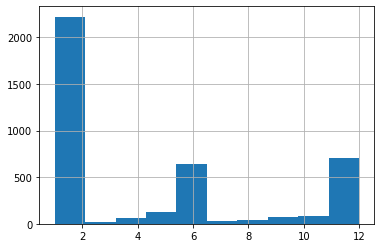

In [15]:
gym.Month_to_end_contract.hist()
plt.show()

55% of our customers have just one month to their contract.

In [16]:
gym.stb.freq(['Month_to_end_contract'])

,Month_to_end_contract,count,percent,cumulative_count,cumulative_percent
0,1.0,2207,55.175,2207,55.175
1,6.0,645,16.125,2852,71.300
2,12.0,524,13.100,3376,84.400
3,11.0,181,4.525,3557,88.925
4,5.0,130,3.250,3687,92.175
5,10.0,82,2.050,3769,94.225
6,9.0,73,1.825,3842,96.050
7,4.0,58,1.450,3900,97.500
8,8.0,38,0.950,3938,98.450
9,7.0,25,0.625,3963,99.075


In [17]:
gym.Lifetime.describe()

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: Lifetime, dtype: float64

The avg lifetime of our customers is 3.7 months.


In [18]:
gym.stb.freq(['Lifetime'])

,Lifetime,count,percent,cumulative_count,cumulative_percent
0,1,843,21.075,843,21.075
1,2,610,15.250,1453,36.325
2,3,490,12.250,1943,48.575
3,0,487,12.175,2430,60.750
4,4,383,9.575,2813,70.325
5,5,273,6.825,3086,77.150
6,6,220,5.500,3306,82.650
7,7,167,4.175,3473,86.825
8,8,111,2.775,3584,89.600
9,9,100,2.500,3684,92.100


In [19]:
gym.Avg_class_frequency_current_month.describe()

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: Avg_class_frequency_current_month, dtype: float64

Most of our customers come to the gym between 1-2 times a week during their subscription lifetime.


In [20]:
gym.Churn.describe()

count    4000.000000
mean        0.265250
std         0.441521
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [21]:
gym.stb.freq(['Churn'])

,Churn,count,percent,cumulative_count,cumulative_percent
0,0,2939,73.475,2939,73.475
1,1,1061,26.525,4000,100.000


26% of our customers leave the gym.

# Step 2. Carry out exploratory data analysis (EDA)


**Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).**

In [22]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


There are a lot of 0's in our data. This is because many columns are based on a 0-1 value.
Gender has a mean of 0.510250 an std of 0.499957. they are very close but of course that they are not identical.
Near_Location: mean of 0.845250 and std of 0.361711.
Partner: mean of 0.486750 and std of 0.499887. they are very close but of course that they are not identical.
Promo_friends: mean of 0.308500 and std of 0.461932.
Phone: mean of 0.903500 and std of 0.295313.
Contract_period: 4.681250 and 4.549706.
Group_visits: 0.412250 and 0.492301
Group_visits: 0.412250 and 0.492301
Age: 29.976523 and 3.009933.
Avg_additional_charges_total: 158.445715 and 99.801599.
Month_to_end_contract: 5.283089 and 4.363522.
Lifetime: 4.711807 and 3.874780.
Avg_class_frequency_total: 2.024876 and 1.016006.
Avg_class_frequency_current_month: 2.027882 and 1.018994

**Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).**

In [23]:
gym_left= gym[gym['Churn'] == 1]
gym_stayed= gym[gym['Churn'] == 0]

In [24]:
gym_by_churn_mean = gym.groupby(['Churn']).mean()
gym_by_churn_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


From the mean of the Avg_additional_charges_total, we sow a mean of 158 for those who stayed and 115 for those who left.
The month-to-end mean was 1.66 for those who left and 5.28 for those who stayed.
The lifetime mean was 4.71 months for those who stayed and 0.99 for those who left.
Also, the mean of Avg_class_frequency_total and Avg_class_frequency_total was higher for customers who stayed.

**Plot bar histograms and feature distributions for those who left (churn) and those who stayed.**

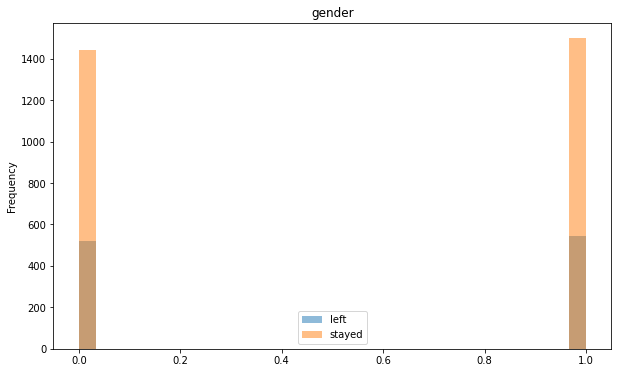

In [25]:
plt.figure(figsize=(10, 6))
gym_left['gender'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['gender'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('gender')
plt.legend(['left', 'stayed'])

plt.show()

Much more customers stayed in our data. There is a slight edge to the customer in gender 1.


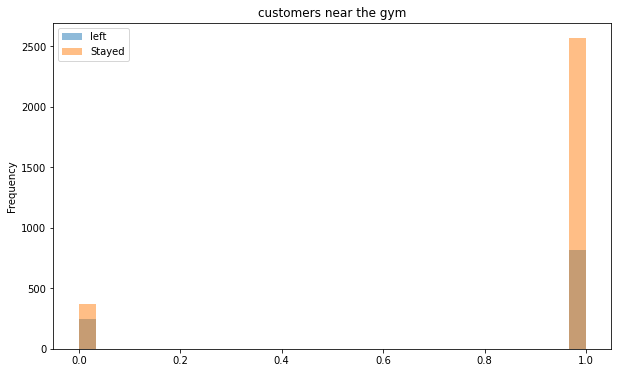

In [25]:
plt.figure(figsize=(10, 6))
gym_left['Near_Location'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Near_Location'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('customers near the gym')
plt.legend(['left', 'Stayed'])

plt.show()

There are much more customers in the GYM near the location.


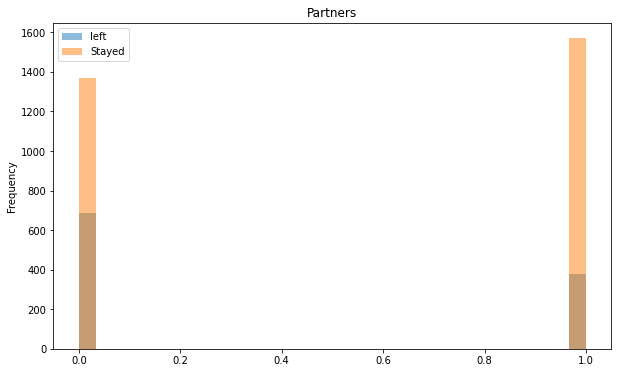

In [26]:
plt.figure(figsize=(10, 6))
gym_left['Partner'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Partner'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Partners')
plt.legend(['left', 'Stayed'])

plt.show()

from the people who stayed more people, customers.

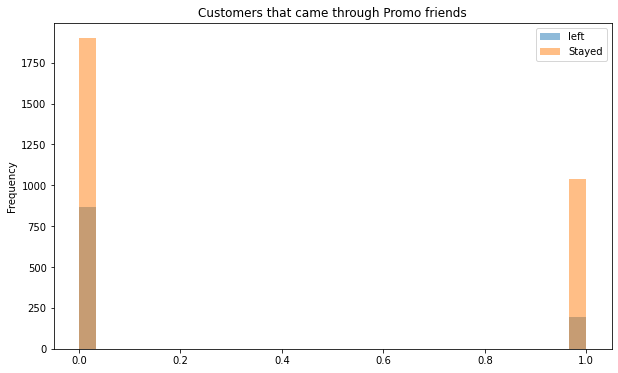

In [27]:
plt.figure(figsize=(10, 6))
gym_left['Promo_friends'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Promo_friends'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Customers that came through Promo friends')
plt.legend(['left', 'Stayed'])

plt.show()

Much more customers didn't come to the gym through promo friends.


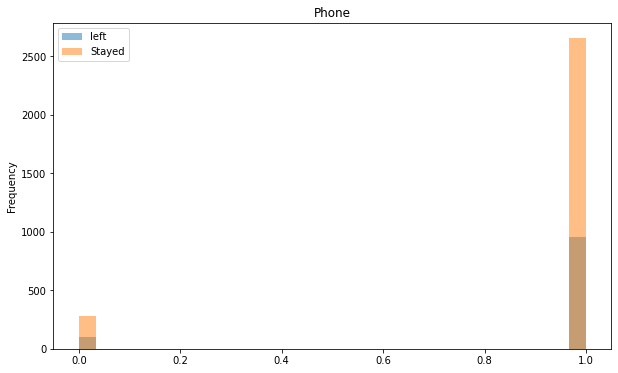

In [28]:
plt.figure(figsize=(10, 6))
gym_left['Phone'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Phone'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Phone')
plt.legend(['left', 'Stayed'])

plt.show()

We dont have all the phone numbers of our customers; this is crucial!

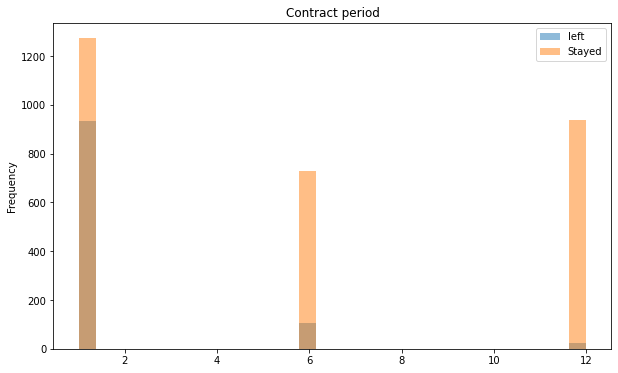

In [29]:
plt.figure(figsize=(10, 6))
gym_left['Contract_period'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Contract_period'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Contract period')
plt.legend(['left', 'Stayed'])

plt.show()

From the people who left, a considerable number of customers sign a month-to-month contract. That is a huge red flag.
Far more customers signed 6-month and 12-month contracts from the customers who stayed. 


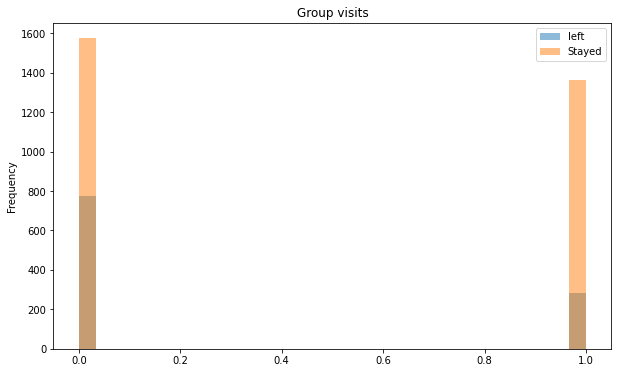

In [30]:
plt.figure(figsize=(10, 6))
gym_left['Group_visits'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Group_visits'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Group visits')
plt.legend(['left', 'Stayed'])

plt.show()

Far more people sign for group training from the people who stayed.

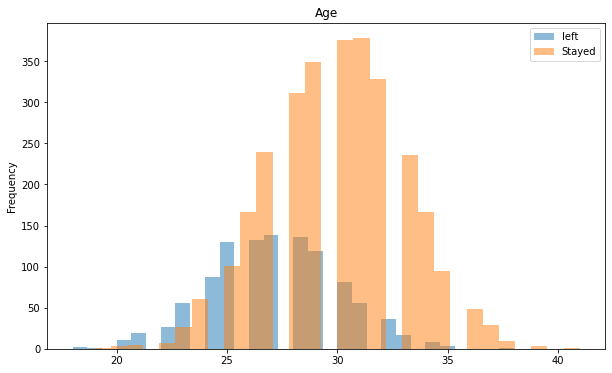

In [31]:
plt.figure(figsize=(10, 6))
gym_left['Age'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Age'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Age')
plt.legend(['left', 'Stayed'])

plt.show()

The majority of customer that comes to the gym is between 25 to 35.


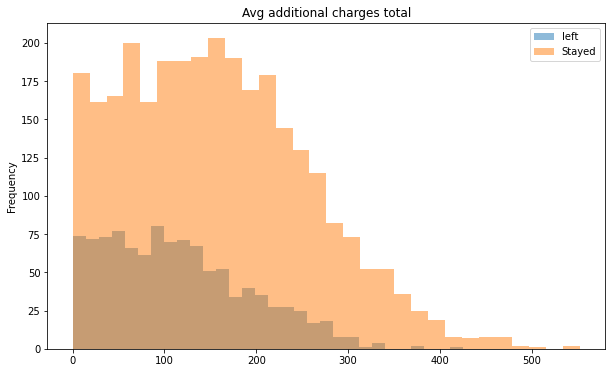

In [33]:
plt.figure(figsize=(10, 6))
gym_left['Avg_additional_charges_total'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Avg_additional_charges_total'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Avg additional charges total')
plt.legend(['left', 'Stayed'])

plt.show()

In [34]:
gym_left.Avg_additional_charges_total.median()

103.81468566076916

In [35]:
gym_stayed.Avg_additional_charges_total.median()

149.88117082862337

The distribution for the Avg_additional_charges_total is skewed to the left in both groups so that we will take the mean.
From the people who left, most of the people spent 103, and from gym_stayed 150.

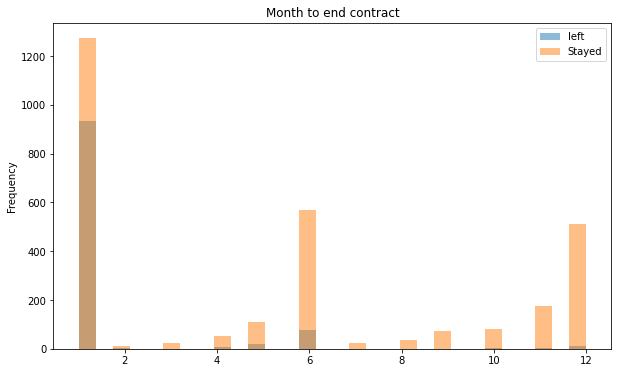

In [36]:
plt.figure(figsize=(10, 6))
gym_left['Month_to_end_contract'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Month_to_end_contract'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Month to end contract')
plt.legend(['left', 'Stayed'])

plt.show()

In [37]:
np.percentile(gym_left.Month_to_end_contract, 88)

1.0

The people who left the majority had just one month to their contract in the gym. (88%).
From the people who stayed, the data is much more spread.

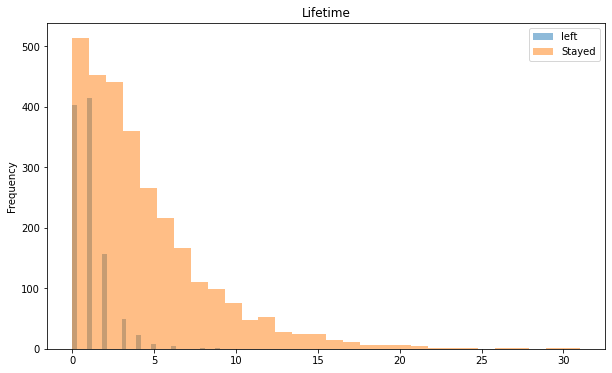

In [40]:
plt.figure(figsize=(10, 6))
gym_left['Lifetime'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Lifetime'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Lifetime')
plt.legend(['left', 'Stayed'])

plt.show()

The lifetime for people who stayed is much higher.


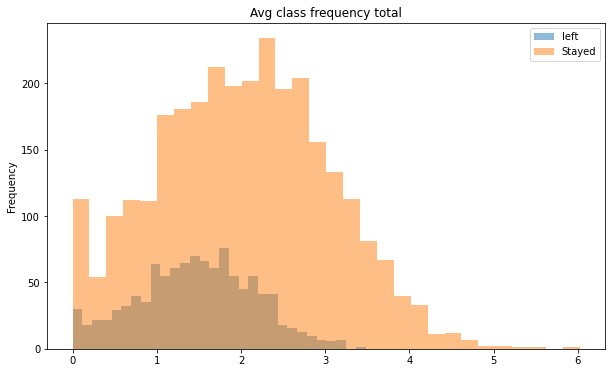

In [41]:
plt.figure(figsize=(10, 6))
gym_left['Avg_class_frequency_total'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Avg_class_frequency_total'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Avg class frequency total')
plt.legend(['left', 'Stayed'])

plt.show()

Most of the people who left come 1 - 2 days a week to the gym.
Most customers come 1 - 3  days a week from the people who stayed.

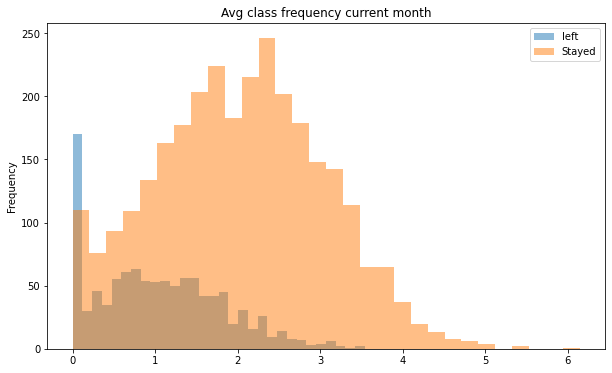

In [42]:
plt.figure(figsize=(10, 6))
gym_left['Avg_class_frequency_current_month'].plot(kind='hist', alpha=0.5, bins=30)
gym_stayed['Avg_class_frequency_current_month'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Avg class frequency current month')
plt.legend(['left', 'Stayed'])

plt.show()

People who stayed in the gym lately visited around 1-3 times.

**Build a correlation matrix and display it.**

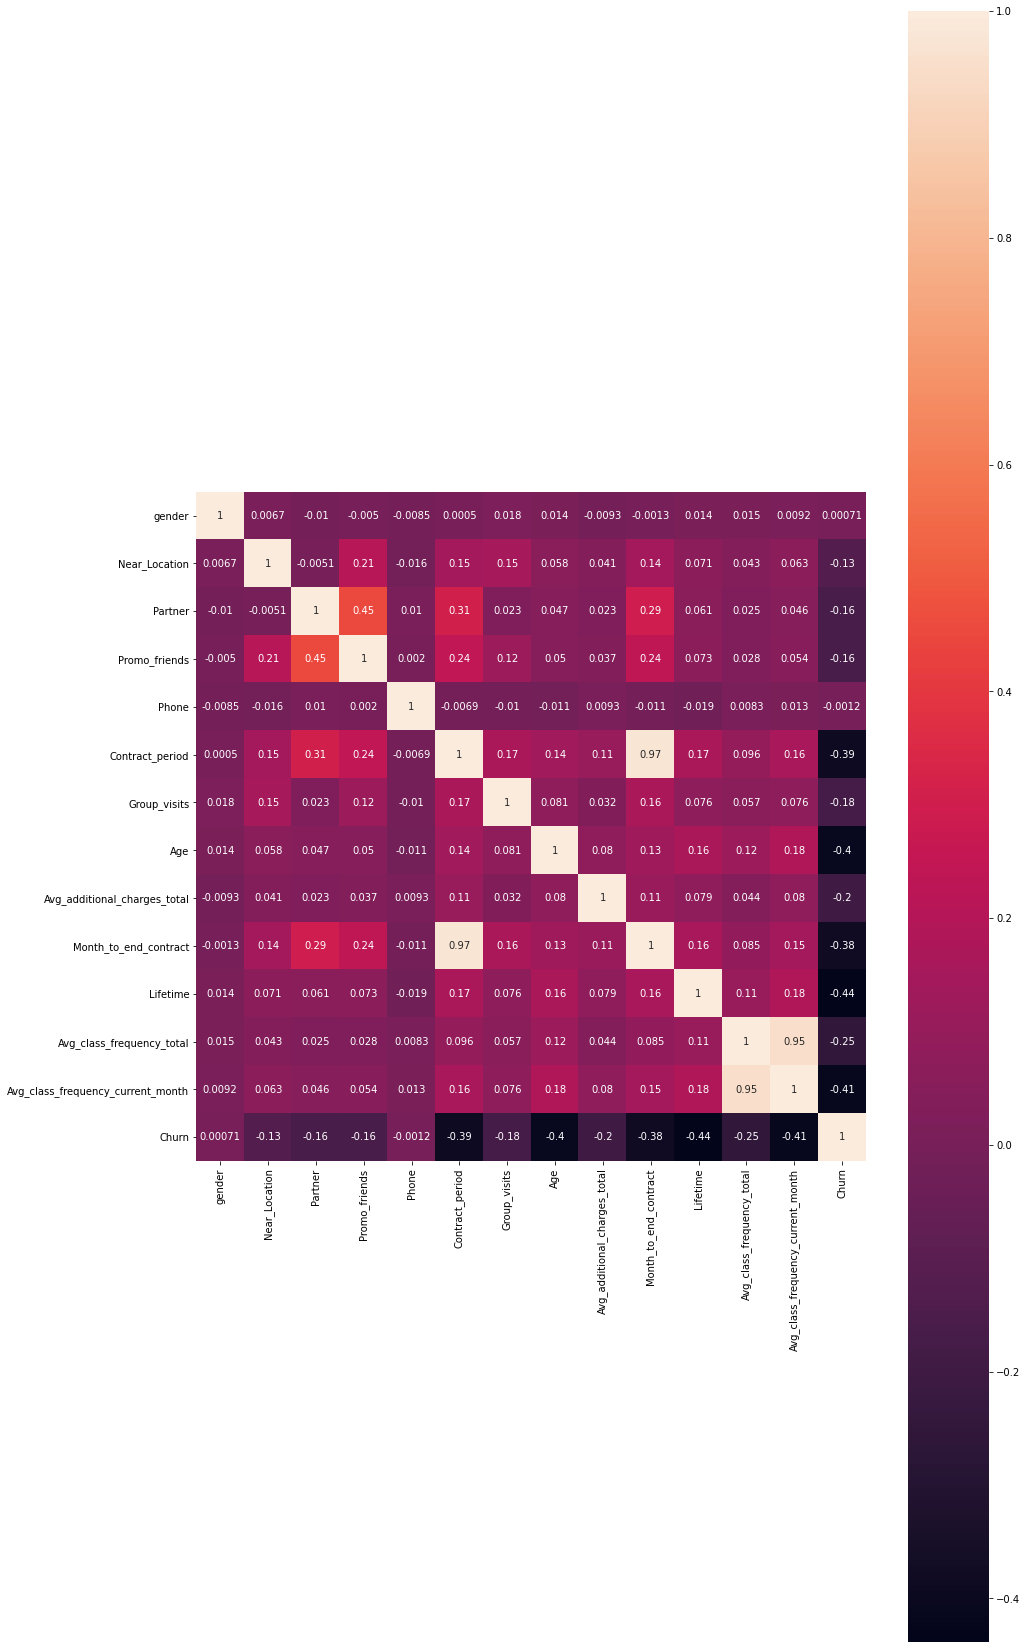

In [43]:
plt.figure(figsize=(15,30))
cm = gym.corr()
sns.heatmap(cm, annot = True, square=True)
plt.show()

This correlation heatmap shows a correlation of 0.97 with the contract period and the month-to-month contract. And a correlation of  0.95 between avg class frequency total and avg class frequency in the current month.

# Step 3. Build a model to predict user churn

Build a binary classification model for customers where the target feature is the user's leaving next month.

**Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?**

In [44]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Train the model on the train set with two methods:
logistic regression
random forest**

In [45]:
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

**Divide the data into train and validation sets using the train_test_split() function.**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
model_1 = LogisticRegression()

In [48]:
model_1.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
probabilities = model_1.predict_proba(X_test)[:,1]

In [50]:
predictions = model_1.predict(X_test)

In [51]:
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.5f}'.format(precision_score(y_test, predictions, average='micro')))
print('Recall: {:.5f}'.format(recall_score(y_test, predictions, average='micro')))
print('F1: {:.5f}'.format(f1_score(y_test, predictions, average='micro')))

Accuracy: 0.90875
Precision: 0.90875
Recall: 0.90875
F1: 0.90875


In [52]:
LogisticRegression_Accu__Prec=accuracy_score(y_test, predictions) + precision_score(y_test, predictions, average='micro')
LogisticRegression_Accu__Prec

1.8175

In [53]:
model_2 = RandomForestClassifier()

In [54]:
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
predictions_2 = model_2.predict(X_test)

In [56]:
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, predictions_2)))
print('Precision: {:.5f}'.format(precision_score(y_test, predictions_2, average='micro')))
print('Recall: {:.5f}'.format(recall_score(y_test, predictions_2, average='micro')))
print('F1: {:.5f}'.format(f1_score(y_test, predictions_2, average='micro')))

Accuracy: 0.91500
Precision: 0.91500
Recall: 0.91500
F1: 0.91500


In [57]:
RandomForestClassifier_Accu__Prec=accuracy_score(y_test, predictions_2) + precision_score(y_test, predictions_2, average='micro')
RandomForestClassifier_Accu__Prec

1.83

In [58]:
if LogisticRegression_Accu__Prec > RandomForestClassifier_Accu__Prec:
    print('LogisticRegression model is the winner')
else:
    print('RandomForestClassifier model is the winner')

RandomForestClassifier model is the winner


Precision talks about how precise/accurate, so this is a crucial score. And Accuracy is to be ensuring that the information is correct and without any mistake. So a high score is also critical.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job!
</div>

# Step 4. Create user clusters

Set aside the column with data on churn and identify object (user) clusters:

**- Standardize the data.**

**- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.**

In [59]:
# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(gym)

In [60]:
linked = linkage(x_sc, method = 'ward')

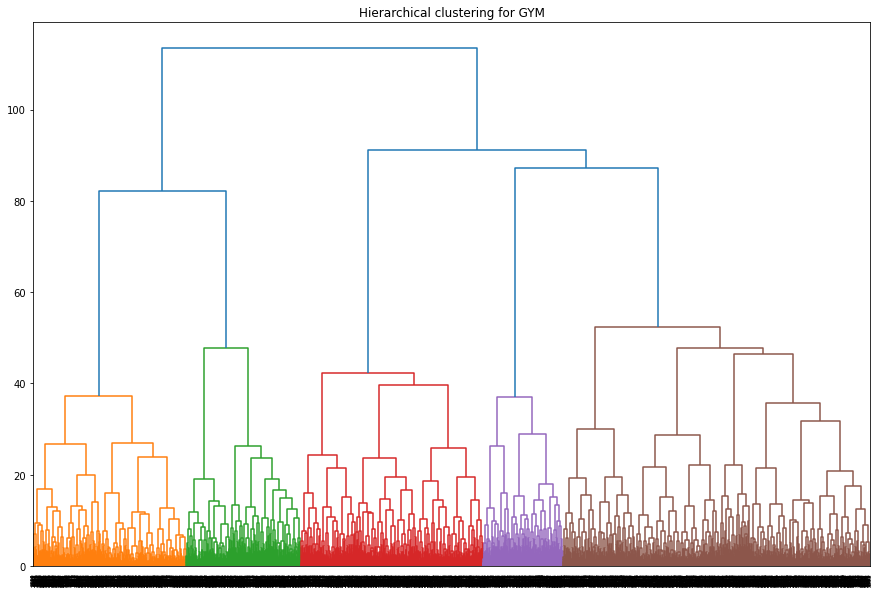

In [61]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

**Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)**

In [62]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5, random_state=0)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

**Look at the mean feature values for clusters. Does anything catch your eye?**

In [63]:
gym['cluster_km'] = labels

**Look at the mean feature values for clusters. Does anything catch your eye?**

In [64]:
feature_mean_for_clusters = gym.groupby(['cluster_km']).mean()
feature_mean_for_clusters

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


The mean churm for cluster 2 is very high, 0.961. also, their lifetime is the lowest - 1.03. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

**Plot distributions of features for the clusters. Do you notice anything?**

In [65]:
def show_clusters_on_scatterplot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
plt.show()    

In [66]:
def show_clusters_on_barplot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.barplot(x=df[x_name], y=df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
plt.show()    

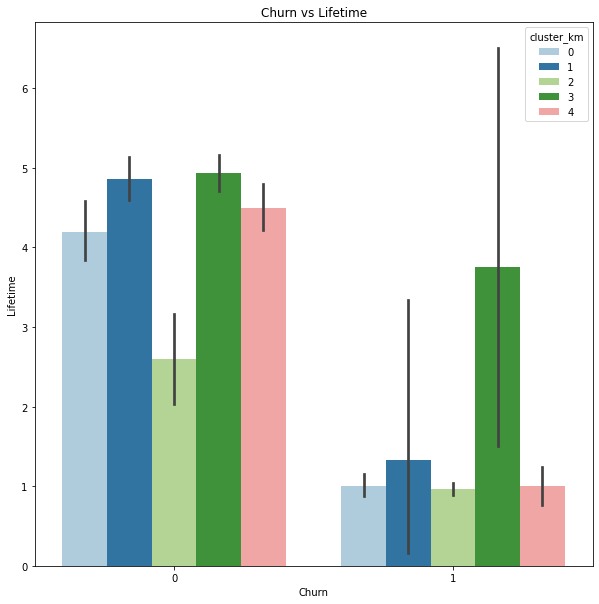

In [67]:
show_clusters_on_barplot(gym, 'Churn','Lifetime', 'cluster_km')

cluster 4 prefom well in terms of the proportion of churm.

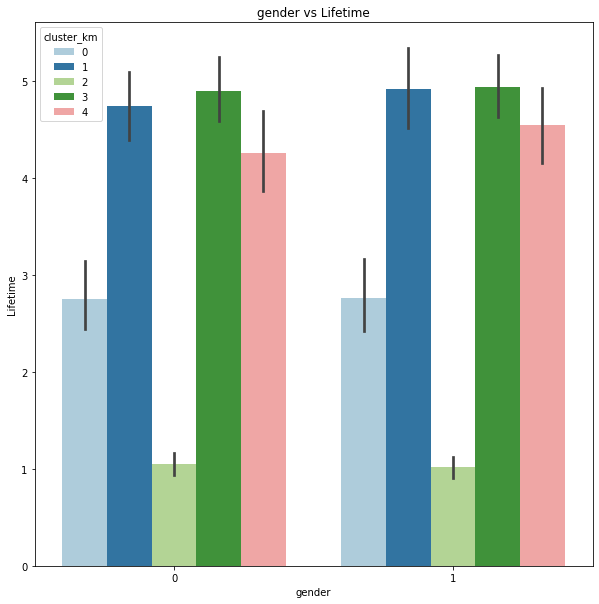

In [68]:
show_clusters_on_barplot(gym, 'gender','Lifetime', 'cluster_km')

Clusters from 1, 3, and 4 have a good lifetime.
Cluster 2 doesn't have a good lifetime.

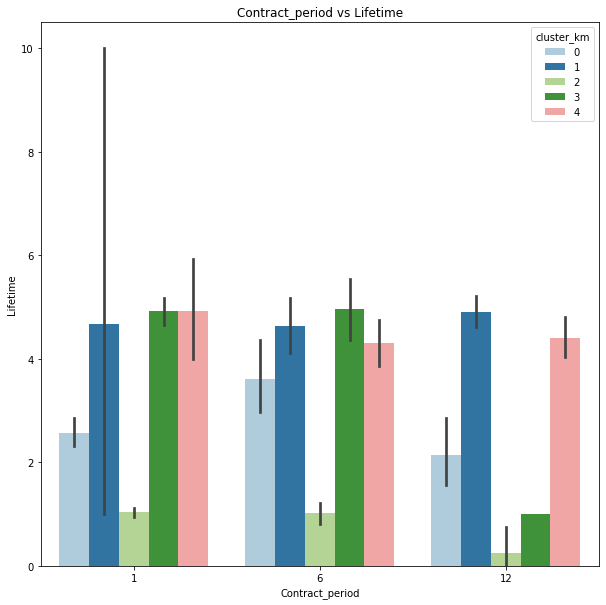

In [69]:
show_clusters_on_barplot(gym, 'Contract_period','Lifetime', 'cluster_km')

Most of the customers from cluster 2 don't sign up for a 12-month contract.

**Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?**

In [70]:
churn_rate =(gym.groupby(['cluster_km'])['Churn'].count() / len(gym)).reset_index()
churn_rate

,cluster_km,Churn
0,0,0.13600
1,1,0.19175
2,2,0.20525
3,3,0.29500
4,4,0.17200


Cluster 3 has the highest churn rate. Cluster 0 has the lowest churn rate. 

# Step 5. Come up with conclusions and basic recommendations on working with customers

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.


**We should try to attract people to sign a long contract to increase retention. We can use a special offer for this.**

**We should encourage customers to sign up for a session group because when people connect socially, they will come to the gym more frequently, which will be an essential part of their lives.**

**We can send SMS and offer to the customer in clusters with a higher churn rate.**